# Overall Stargal Stats

Preliminary work for star-gal separation. Performs statistics on lephare outputs carried on two synthetic magnitude libraries (one composed of star SED, another of galaxies SEDs).

SPLIT add two columns to LePHARE:
 - pdz_flag: describes the quality of the computed redshift
 - s-type: the most likely type of star (OBAFGKM) if the observed source was a star


In [1]:
### Libraries ###
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from lephare import statsplot as lsp; reload(lsp)
# %matplotlib widget
%matplotlib inline

LEPHAREDIR is being set to the default cache directory:
/home/hallouin/.cache/lephare/data
More than 1Gb may be written there.
LEPHAREWORK is being set to the default cache directory:
/home/hallouin/.cache/lephare/work
Default work cache is already linked. 
This is linked to the run directory:
/home/hallouin/.cache/lephare/runs/20251013T115331


## Tests on DES stars

In [23]:
### Generate pandas df from output catalog ###
base_dir = os.path.abspath(os.path.join(os.getcwd(), '../..')) #change to your lephare base_dir
CAT_OUT = os.path.join(base_dir, 'training_stats/simulation_catalogs/star_gal/DP1gal_Buzzard_PICKLES_LSST_short.out')

photoz_dp1 = lsp.lephare_to_pandas(CAT_OUT)
### Clean error values
photoz_dp1 = photoz_dp1[photoz_dp1['Z_BEST']>0] #here we do not delete the Z_BEST=-99.9 values because of the presence of stars.
photoz_dp1

,IDENT,Z_BEST,Z_MED,Z_MODE,CHI_BEST,MOD_BEST,SCALE_BEST,NBAND_USED,Z_SEC,CHI_SEC,...,MAG_OBS3,MAG_OBS4,MAG_OBS5,ERR_MAG_OBS0,ERR_MAG_OBS1,ERR_MAG_OBS2,ERR_MAG_OBS3,ERR_MAG_OBS4,ERR_MAG_OBS5,ZSPEC
30,611256584470808273,0.13120,0.1300,0.1300,532.71900,8,2.709460,6,-99.9,1.000000e+09,...,16.152,15.910,15.689,0.024,0.001,0.007,0.001,0.002,0.003,-99.9
33,609788117972429952,1.50200,1.5147,1.5037,22.54090,87,4.984180,6,-99.9,1.000000e+09,...,21.691,21.601,21.430,0.121,0.010,0.013,0.019,0.027,0.093,-99.9
34,609788117972429043,0.49910,0.4727,0.4868,6.81591,42,0.595344,6,-99.9,1.000000e+09,...,21.157,20.897,20.727,0.202,0.024,0.016,0.018,0.023,0.079,-99.9
35,609788117972429074,0.07245,0.0700,0.0700,102.91100,42,0.085272,6,-99.9,1.000000e+09,...,18.376,18.226,18.177,0.038,0.002,0.003,0.005,0.006,0.022,-99.9
36,609788117972428733,0.13120,0.1320,0.1315,40.31300,68,0.079743,6,-99.9,1.000000e+09,...,19.718,19.697,19.744,0.047,0.006,0.010,0.010,0.011,0.051,-99.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27600,611254454167027855,0.42290,0.4263,0.4219,3.91791,82,0.095712,6,-99.9,1.000000e+09,...,22.335,22.236,22.102,0.105,0.010,0.007,0.011,0.018,0.101,-99.9
27601,611254454167026730,0.24960,0.2524,0.2499,27.89110,13,0.088863,6,-99.9,1.000000e+09,...,21.598,21.278,21.148,0.153,0.007,0.003,0.003,0.005,0.028,-99.9
27602,611254454167027872,0.63730,0.6369,0.6372,2.33836,88,0.057920,6,-99.9,1.000000e+09,...,23.884,23.821,23.603,0.160,0.027,0.023,0.026,0.051,0.263,-99.9
27603,611254454167027849,0.38270,0.3711,0.3817,1.39146,70,0.066688,6,-99.9,1.000000e+09,...,22.586,22.387,22.368,0.091,0.008,0.005,0.007,0.013,0.082,-99.9


In [24]:
### error observed mag bining
photoz_dp1_errmag001 = photoz_dp1[photoz_dp1['ERR_MAG_OBS1']<0.002]
photoz_dp1_errmag002 = photoz_dp1[(photoz_dp1['ERR_MAG_OBS1']>=0.002) & (photoz_dp1['ERR_MAG_OBS1']<0.003)]
photoz_dp1_errmag003 = photoz_dp1[(photoz_dp1['ERR_MAG_OBS1']>=0.003)]# & (photoz_dp1['ERR_MAG_OBS1']<=0.1)]
# photoz_dp1_errmag1 = photoz_dp1[(photoz_dp1['ERR_MAG_OBS1']>0.1)]

### observed mag bining
photoz_dp1_mag20 = photoz_dp1[photoz_dp1['MAG_OBS1']<20]
photoz_dp1_mag21 = photoz_dp1[(photoz_dp1['MAG_OBS1']>=20) & (photoz_dp1['MAG_OBS1']<21)]
photoz_dp1_mag22 = photoz_dp1[(photoz_dp1['MAG_OBS1']>=21)]


In [25]:
photoz_dp1_magbin = (photoz_dp1_mag20, photoz_dp1_mag21, photoz_dp1_mag22)
photoz_dp1_magbin_labels = ['Rmag < 20', 'Rmag < 21', 'Rmag > 21']
photoz_dp1_emagbin = (photoz_dp1_errmag001, photoz_dp1_errmag002, photoz_dp1_errmag003)
photoz_dp1_emagbin_labels = ['Remag < 0.002', 'Remag < 0.003', 'Remag > 0.003']

zz_plot

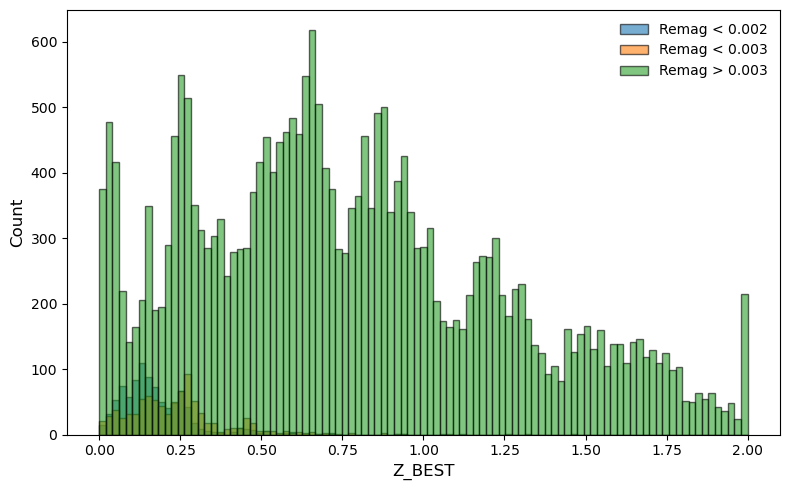

In [28]:
#Plot z hist
# %matplotlib widget
lsp.histograms(photoz_dp1_emagbin, xrange=(0,2), labels=photoz_dp1_emagbin_labels)

Chi2 distribution, pit and qq-plot

/home/hallouin/Documents/t_hall/lephare/src/lephare/statsplot.py:473: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=9, frameon=False)
/home/hallouin/Documents/t_hall/lephare/src/lephare/statsplot.py:474: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


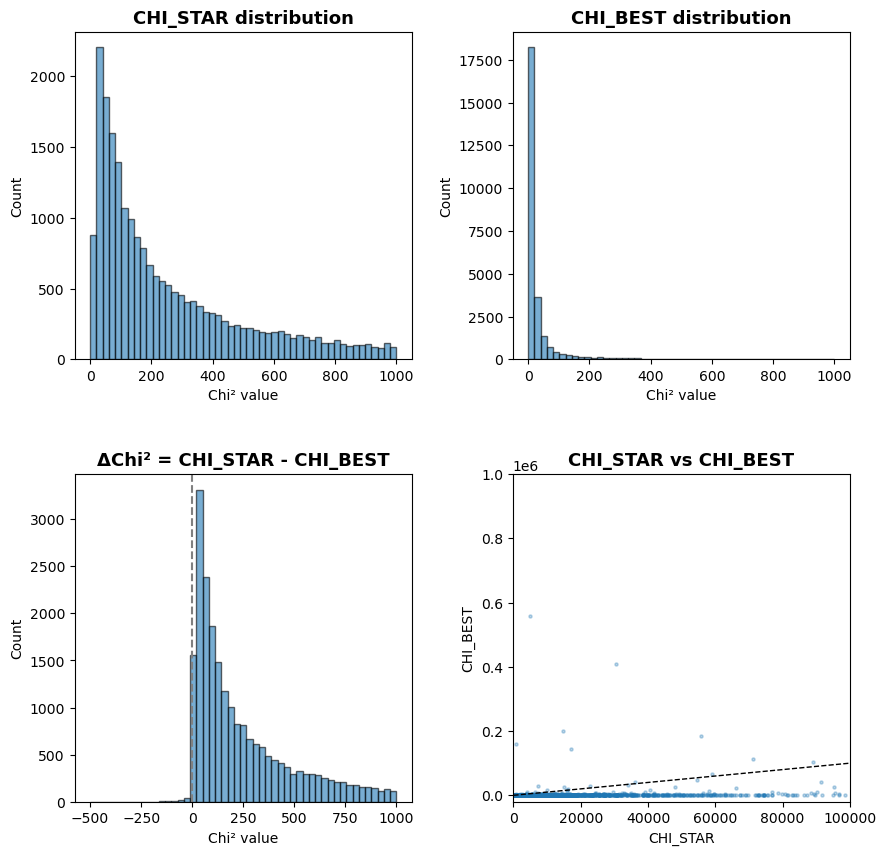

In [29]:
# %matplotlib widget

lsp.chi_stats(data = photoz_dp1, mask_min=-500, mask_max=1000, bins=50,
             scatter_xlim=(-200, 1e5), scatter_ylim=(-20000, 1e6))

/home/hallouin/Documents/t_hall/lephare/src/lephare/statsplot.py:209: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax_scatter.legend(fontsize='small', loc='upper left', frameon=False)


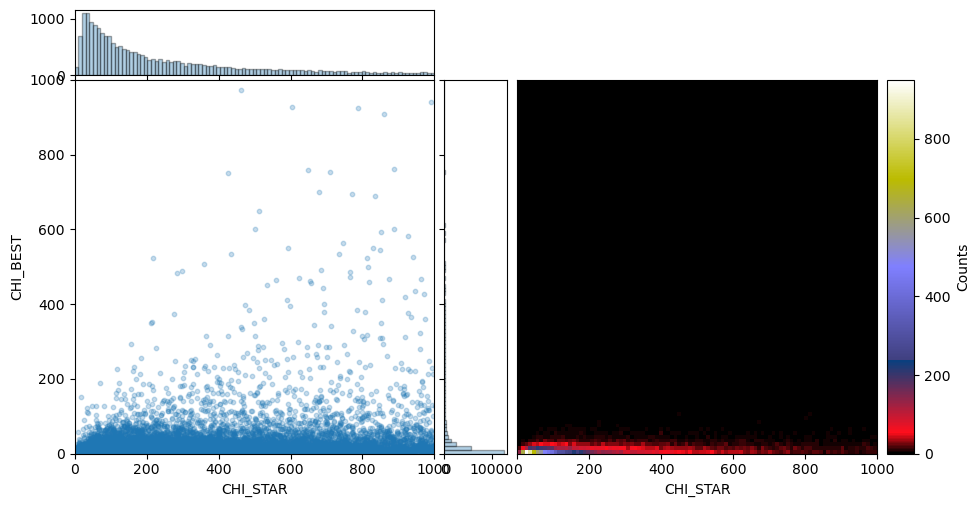

In [30]:

lsp.scatter_vs_hist2D(data=photoz_dp1, cmaps='gist_stern', deltaz=None, y_col='CHI_BEST', x_col='CHI_STAR', xrange=(0,1000), yrange=(0,1000), dline=False)

$\Delta\chi$ analysis

In [ ]:
delta = photoz_dp1['CHI_STAR']-photoz_dp1['CHI_BEST']
delta = delta[photoz_dp1['Z_BEST']>=0]

27179


In [32]:
print("n(Delta>0) / n = ", len(delta[delta>0])/len(delta))

n(Delta>0) / n =  0.9931564811067368


flag VS stype

NameError: name 'zphota' is not defined

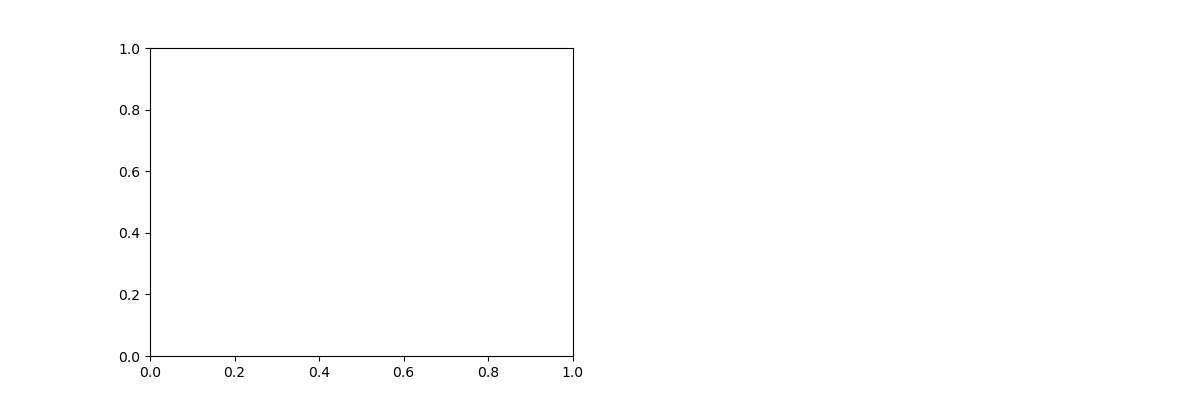

In [43]:
###Flag and type distribution

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.hist(zphota["PDZ_FLAG"][zphota["PDZ_FLAG"]>=0], bins=100, alpha=0.7, edgecolor='black')#, density=True)#, log=True)
plt.title("PDZ flag distribution")
plt.subplot(122)
plt.title("S-type distribution")
plt.hist(zphota["S_TYPE"], bins=100, alpha=0.7, edgecolor='black', color='orange')#, density=True)#, log=True)

# plt.ylim(0,0.010)
plt.legend()
plt.show()

In [ ]:
import seaborn as sns
plt.rcParams.update({'font.size': 6})
contingency = pd.crosstab(zphota["S_TYPE"], zphota["PDZ_FLAG"])

# Plot avec seaborn
plt.figure(figsize=(18,16))
sns.heatmap(contingency, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 6.5})
plt.title("Distribution des flags par type d'étoile")
plt.ylabel("Type d'étoile")
plt.xlabel("Flag")
plt.show()


In [ ]:
plt.figure(figsize=(15,13))

sns.stripplot(x=zphota["CHI_STAR"]-zphota["CHI_BEST"], y=zphota["S_TYPE"], jitter=True, size=6)
plt.title("DeltaChi distribution as a function of source-type")
plt.ylabel("Type d'étoile")
plt.xlabel("Delta Chi =  Chi_star - Chi_best")
plt.xlim(-1e4,1e4)
plt.show()

In [ ]:
###Flag and type distribution

plt.figure(figsize=(4, 4))
mask=(zphota["CHI_STAR"]<1e4) & (zphota["CHI_BEST"]<1e4)
plt.hist(zphota["CHI_STAR"] - zphota["CHI_BEST"], bins=1000000, alpha=0.7, edgecolor='black')#, density=True)#, log=True)
plt.title("Delta Chi dist")


# plt.ylim(0,0.010)
plt.legend()
plt.show()